In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None)

In [25]:
df = pd.read_csv('data/student-mat.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [26]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [27]:
df['sex'] = df['sex'].apply(lambda row: 1 if row == 'M' else 0)
df['address'] = df['address'].apply(lambda row: 1 if row == 'R' else 0)
df['famsize'] = df['famsize'].apply(lambda row: 1 if row == 'GT3' else 0)
df['Pstatus'] = df['Pstatus'].apply(lambda row: 1 if row == 'A' else 0)
df['school'] = df['school'].apply(lambda row: 1 if row == 'GP' else 0)
df['schoolsup'].value_counts()

schoolsup
no     344
yes     51
Name: count, dtype: int64

In [28]:
encoder = OneHotEncoder(sparse=False, drop=None)
encoded_data = encoder.fit_transform(df[['Mjob', 'Fjob', 'reason', 'guardian']])
encoded_columns = encoder.get_feature_names_out(input_features=['Mjob', 'Fjob', 'reason', 'guardian'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
encoded_df

c:\Users\tomad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
391,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
392,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
393,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
df.drop(columns=['Mjob', 'Fjob', 'reason', 'guardian'],inplace=True)
df_3 = df.join(encoded_df)

In [30]:
def transform_y(x):
  if x == 'no':
    return 0
  else:
    return 1

In [31]:
columns_yn = [ 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
df_3[columns_yn] = df_3[columns_yn].applymap(lambda x: transform_y(x))
df=df_3

C:\Users\tomad\AppData\Local\Temp\ipykernel_12356\3654535902.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_3[columns_yn] = df_3[columns_yn].applymap(lambda x: transform_y(x))


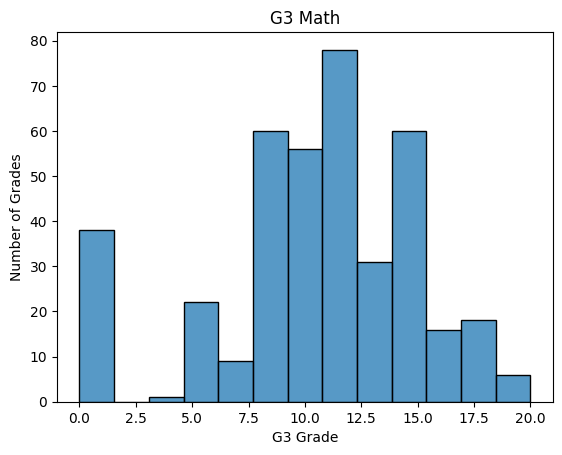

In [33]:
sns_plot = sns.histplot(df["G3"])
sns_plot.set(title='G3 Math', )
sns_plot.set(xlabel='G3 Grade', ylabel='Number of Grades')
fig = sns_plot.get_figure()
fig.savefig("images/mat/G3_Hist.png")

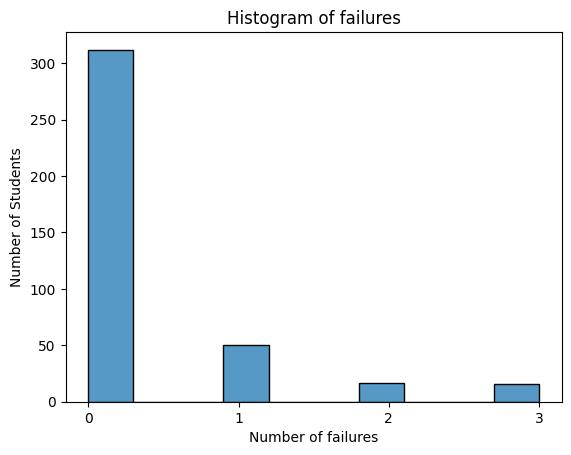

In [34]:
sns_plot = sns.histplot(df["failures"])
sns_plot.set(title='Histogram of failures', )
sns_plot.set(xlabel='Number of failures', ylabel='Number of Students')
sns_plot.set_xticks([0,1,2,3])
fig = sns_plot.get_figure()
fig.savefig("images/mat/failures_hist.png")

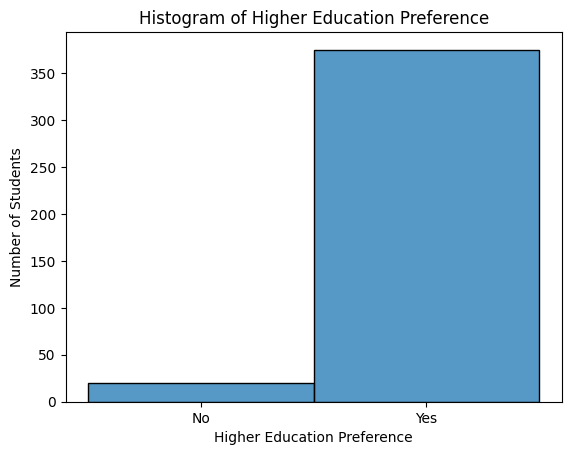

In [35]:
sns_plot = sns.histplot(df["higher"], bins=[-0.5, 0.5, 1.5], discrete=True)
sns_plot.set(title='Histogram of Higher Education Preference')
sns_plot.set(xlabel='Higher Education Preference', ylabel='Number of Students')
sns_plot.set_xticks([0, 1])
sns_plot.set_xticklabels(['No', 'Yes'])
fig = sns_plot.get_figure()
fig.savefig("images/mat/higher_education_hist.png")
plt.show()

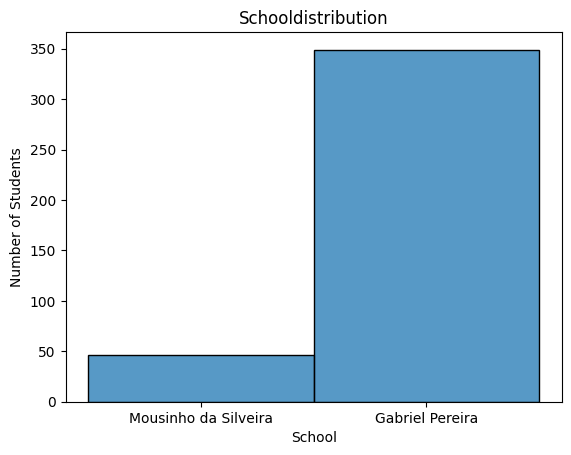

In [36]:
sns_plot = sns.histplot(df["school"], bins=[-0.5, 0.5, 1.5], discrete=True)
sns_plot.set(title='Schooldistribution')
sns_plot.set(xlabel='School', ylabel='Number of Students')
sns_plot.set_xticks([0, 1])
sns_plot.set_xticklabels(['Mousinho da Silveira', 'Gabriel Pereira'])
fig = sns_plot.get_figure()
fig.savefig("images/mat/Schooldistribution.png")
plt.show()

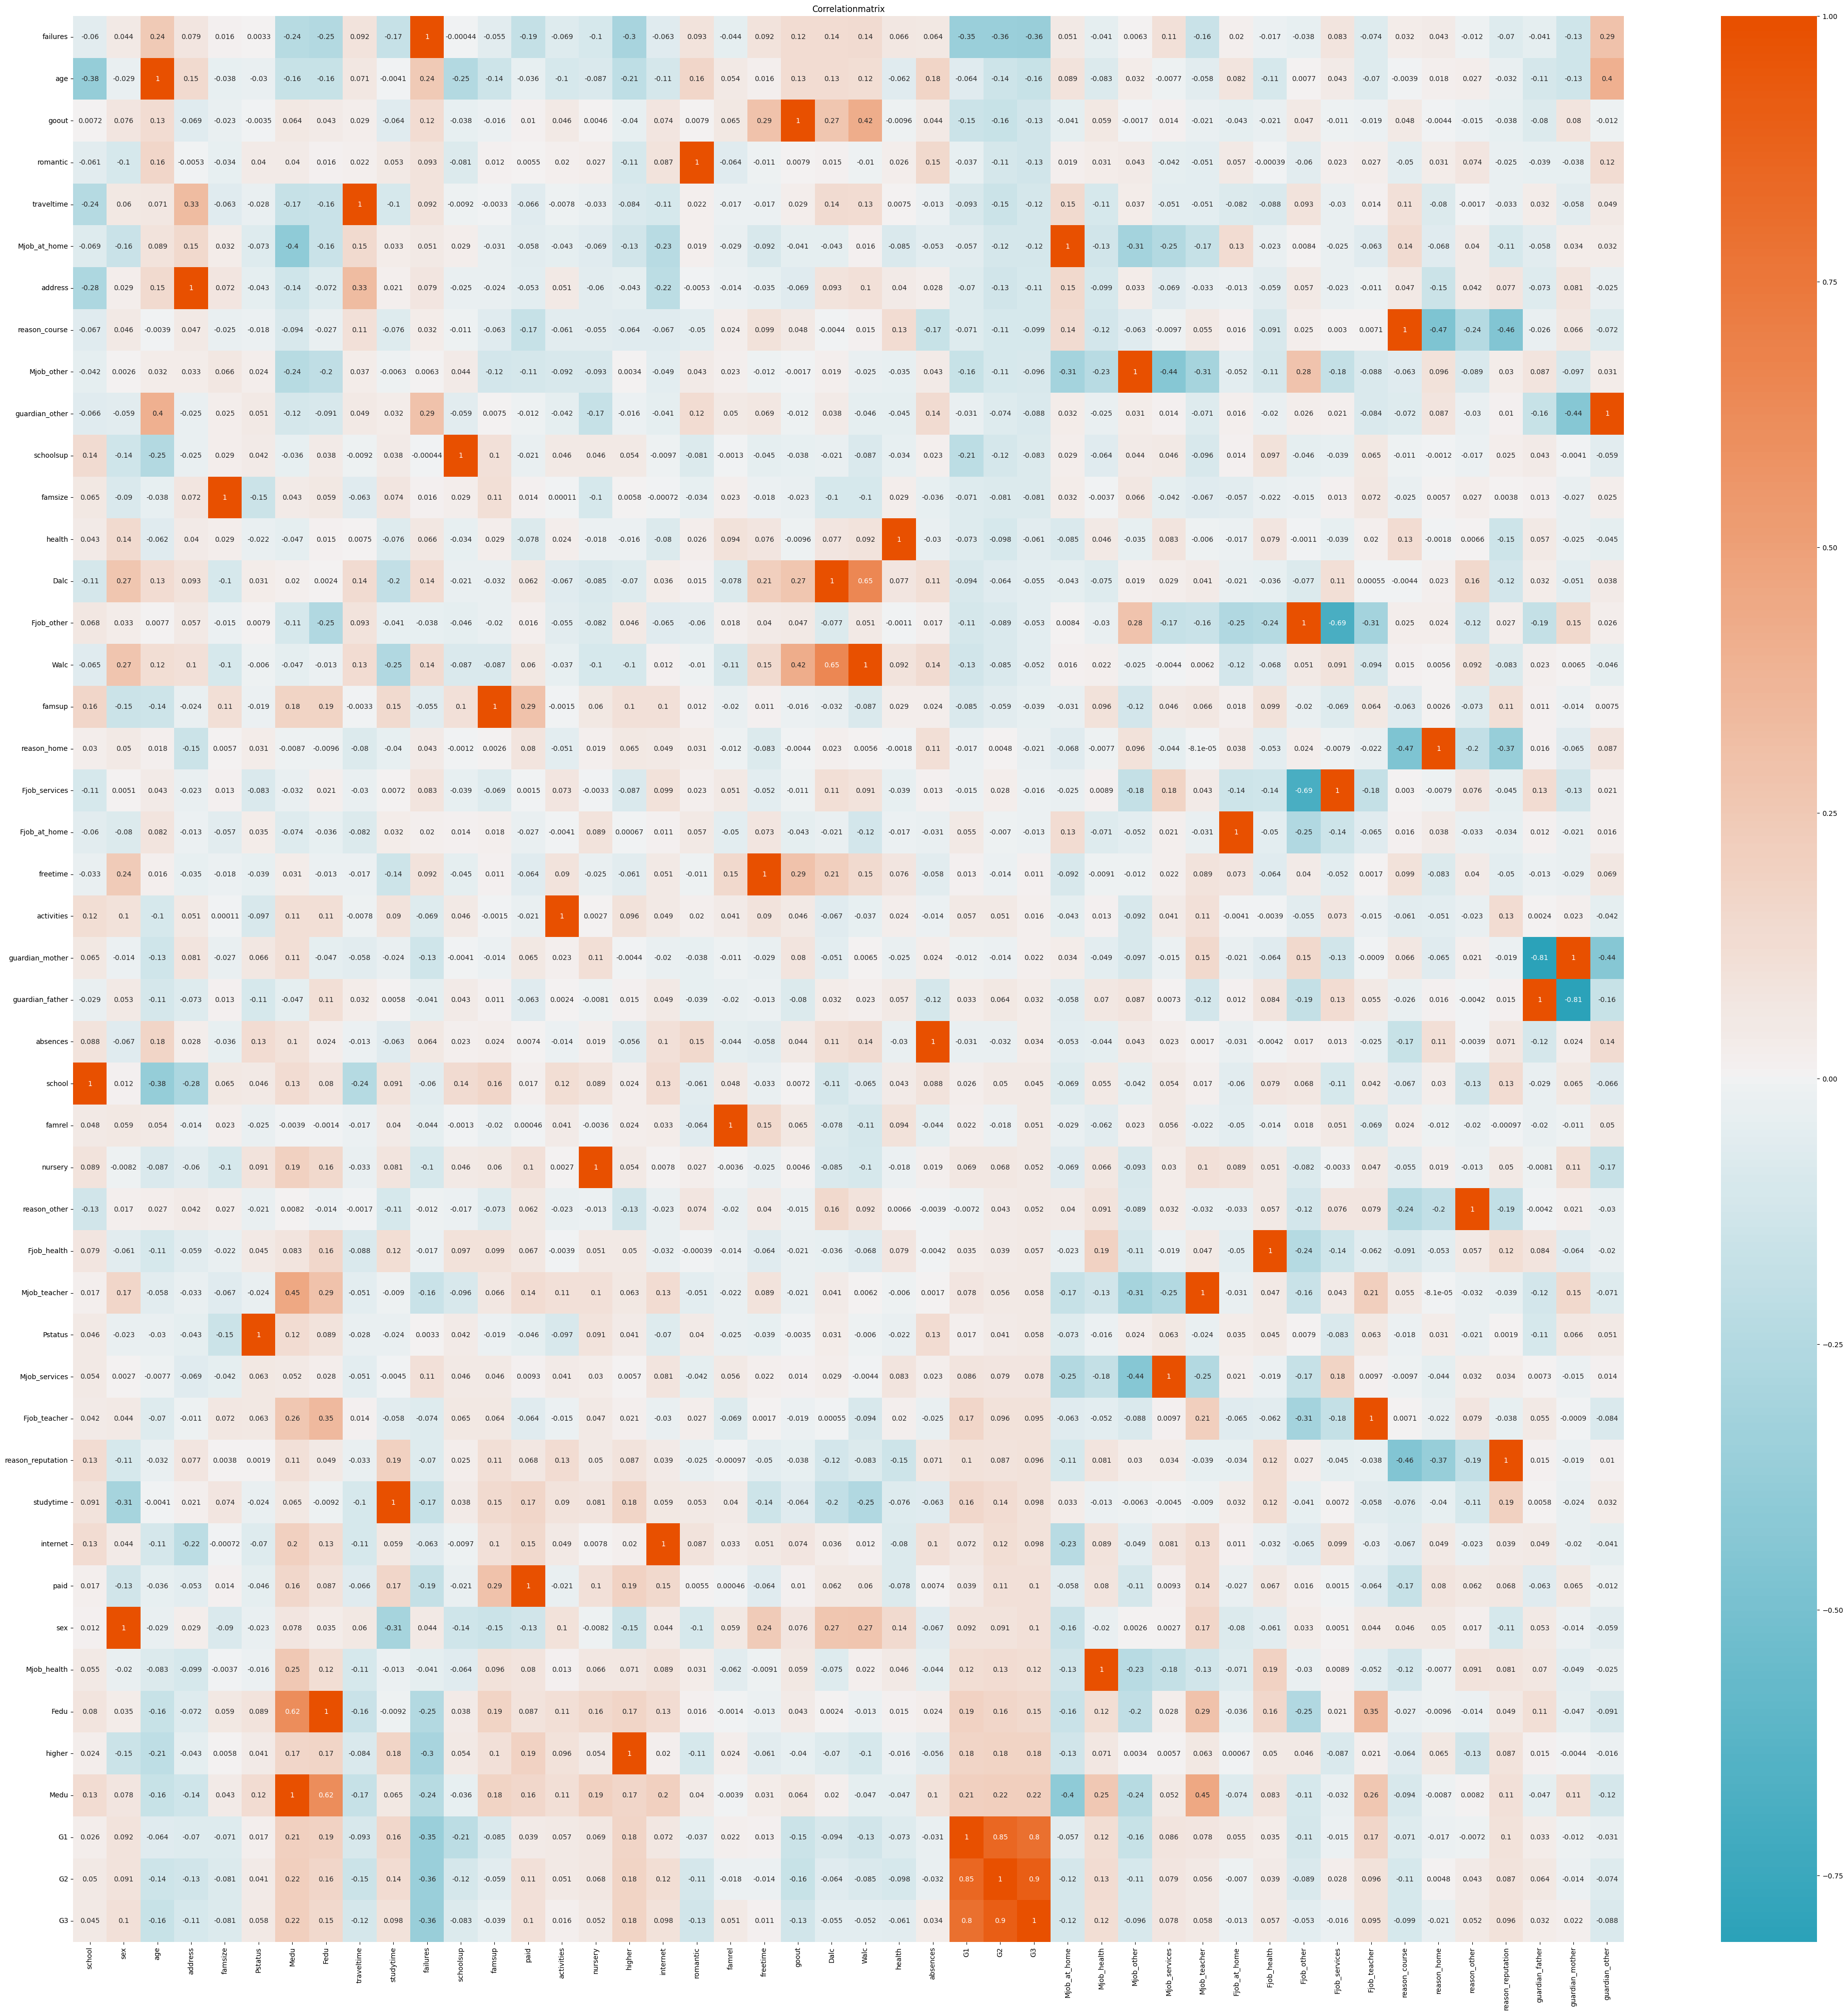

In [37]:
correlation_matrix = df.corr()
plt.figure(figsize=(50, 50))
cmap = sns.diverging_palette(220, 20, s=100, l=55, as_cmap=True)
sns_plot = sns.heatmap(correlation_matrix.sort_values('G3', axis=0), annot=True, cmap=cmap, center=0)
sns_plot.set(title='Correlationmatrix', )
fig = sns_plot.get_figure()
fig.savefig("images/mat/Correlationmatrix.png")
plt.show()

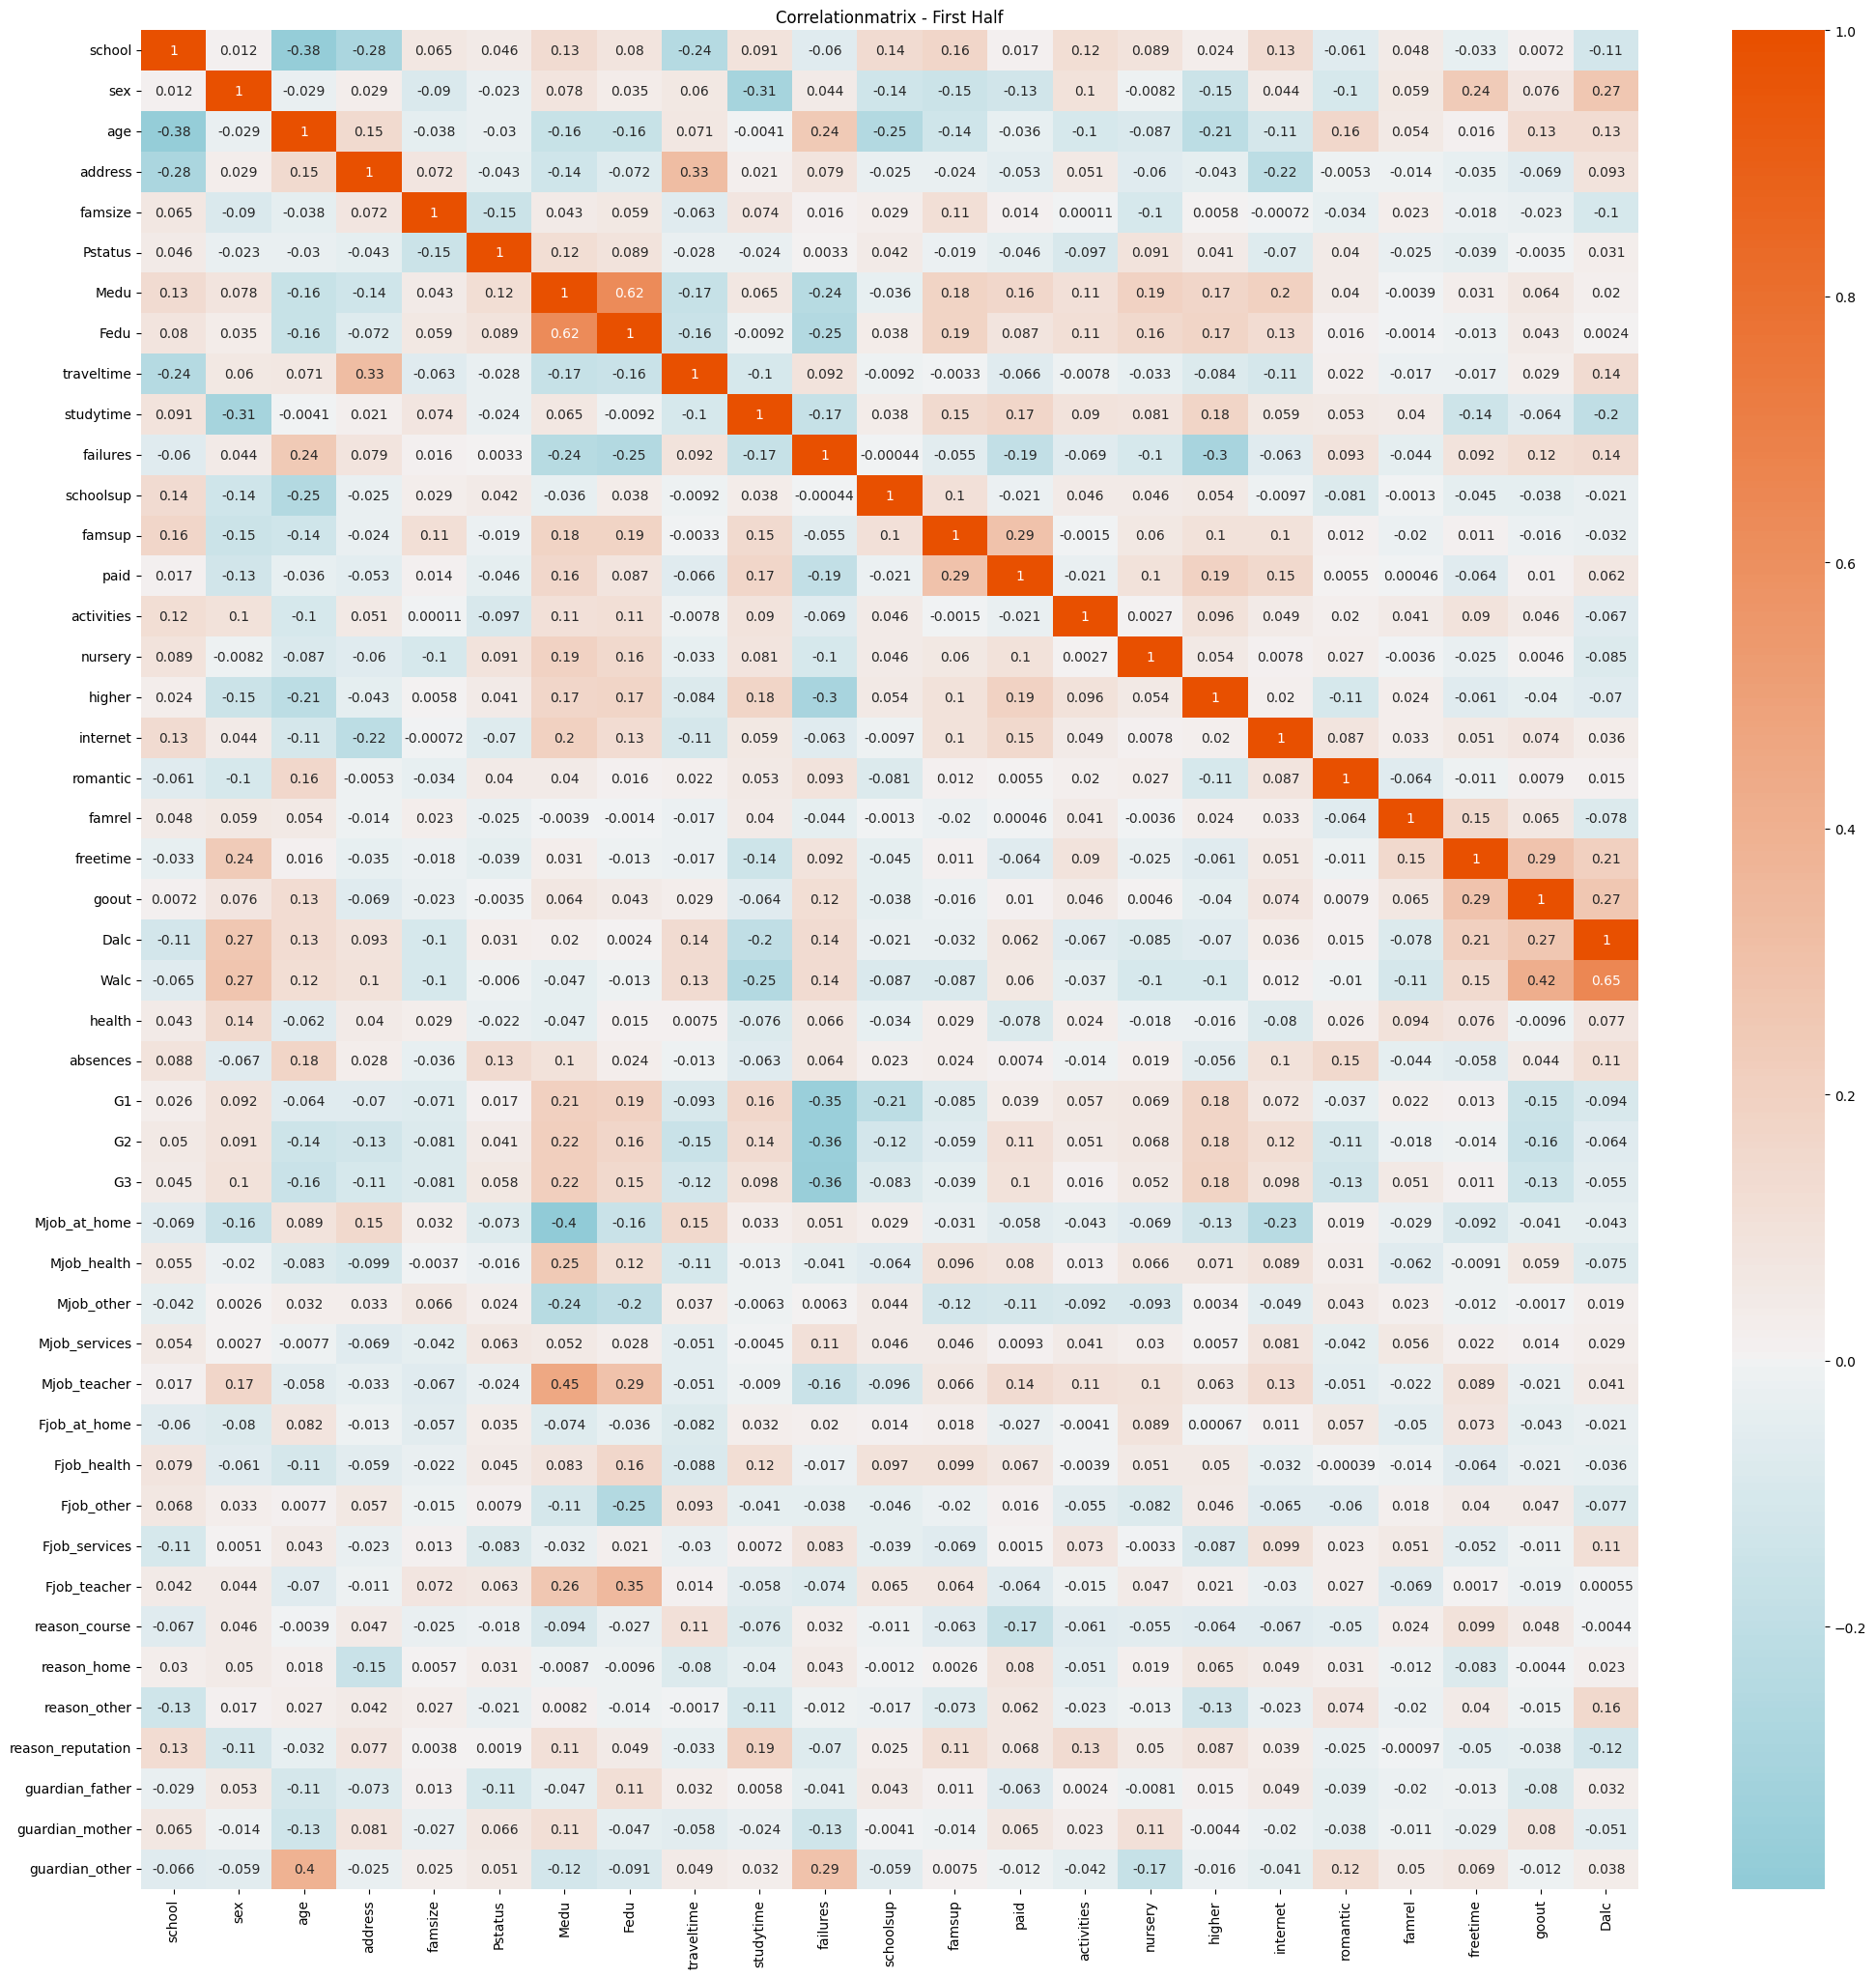

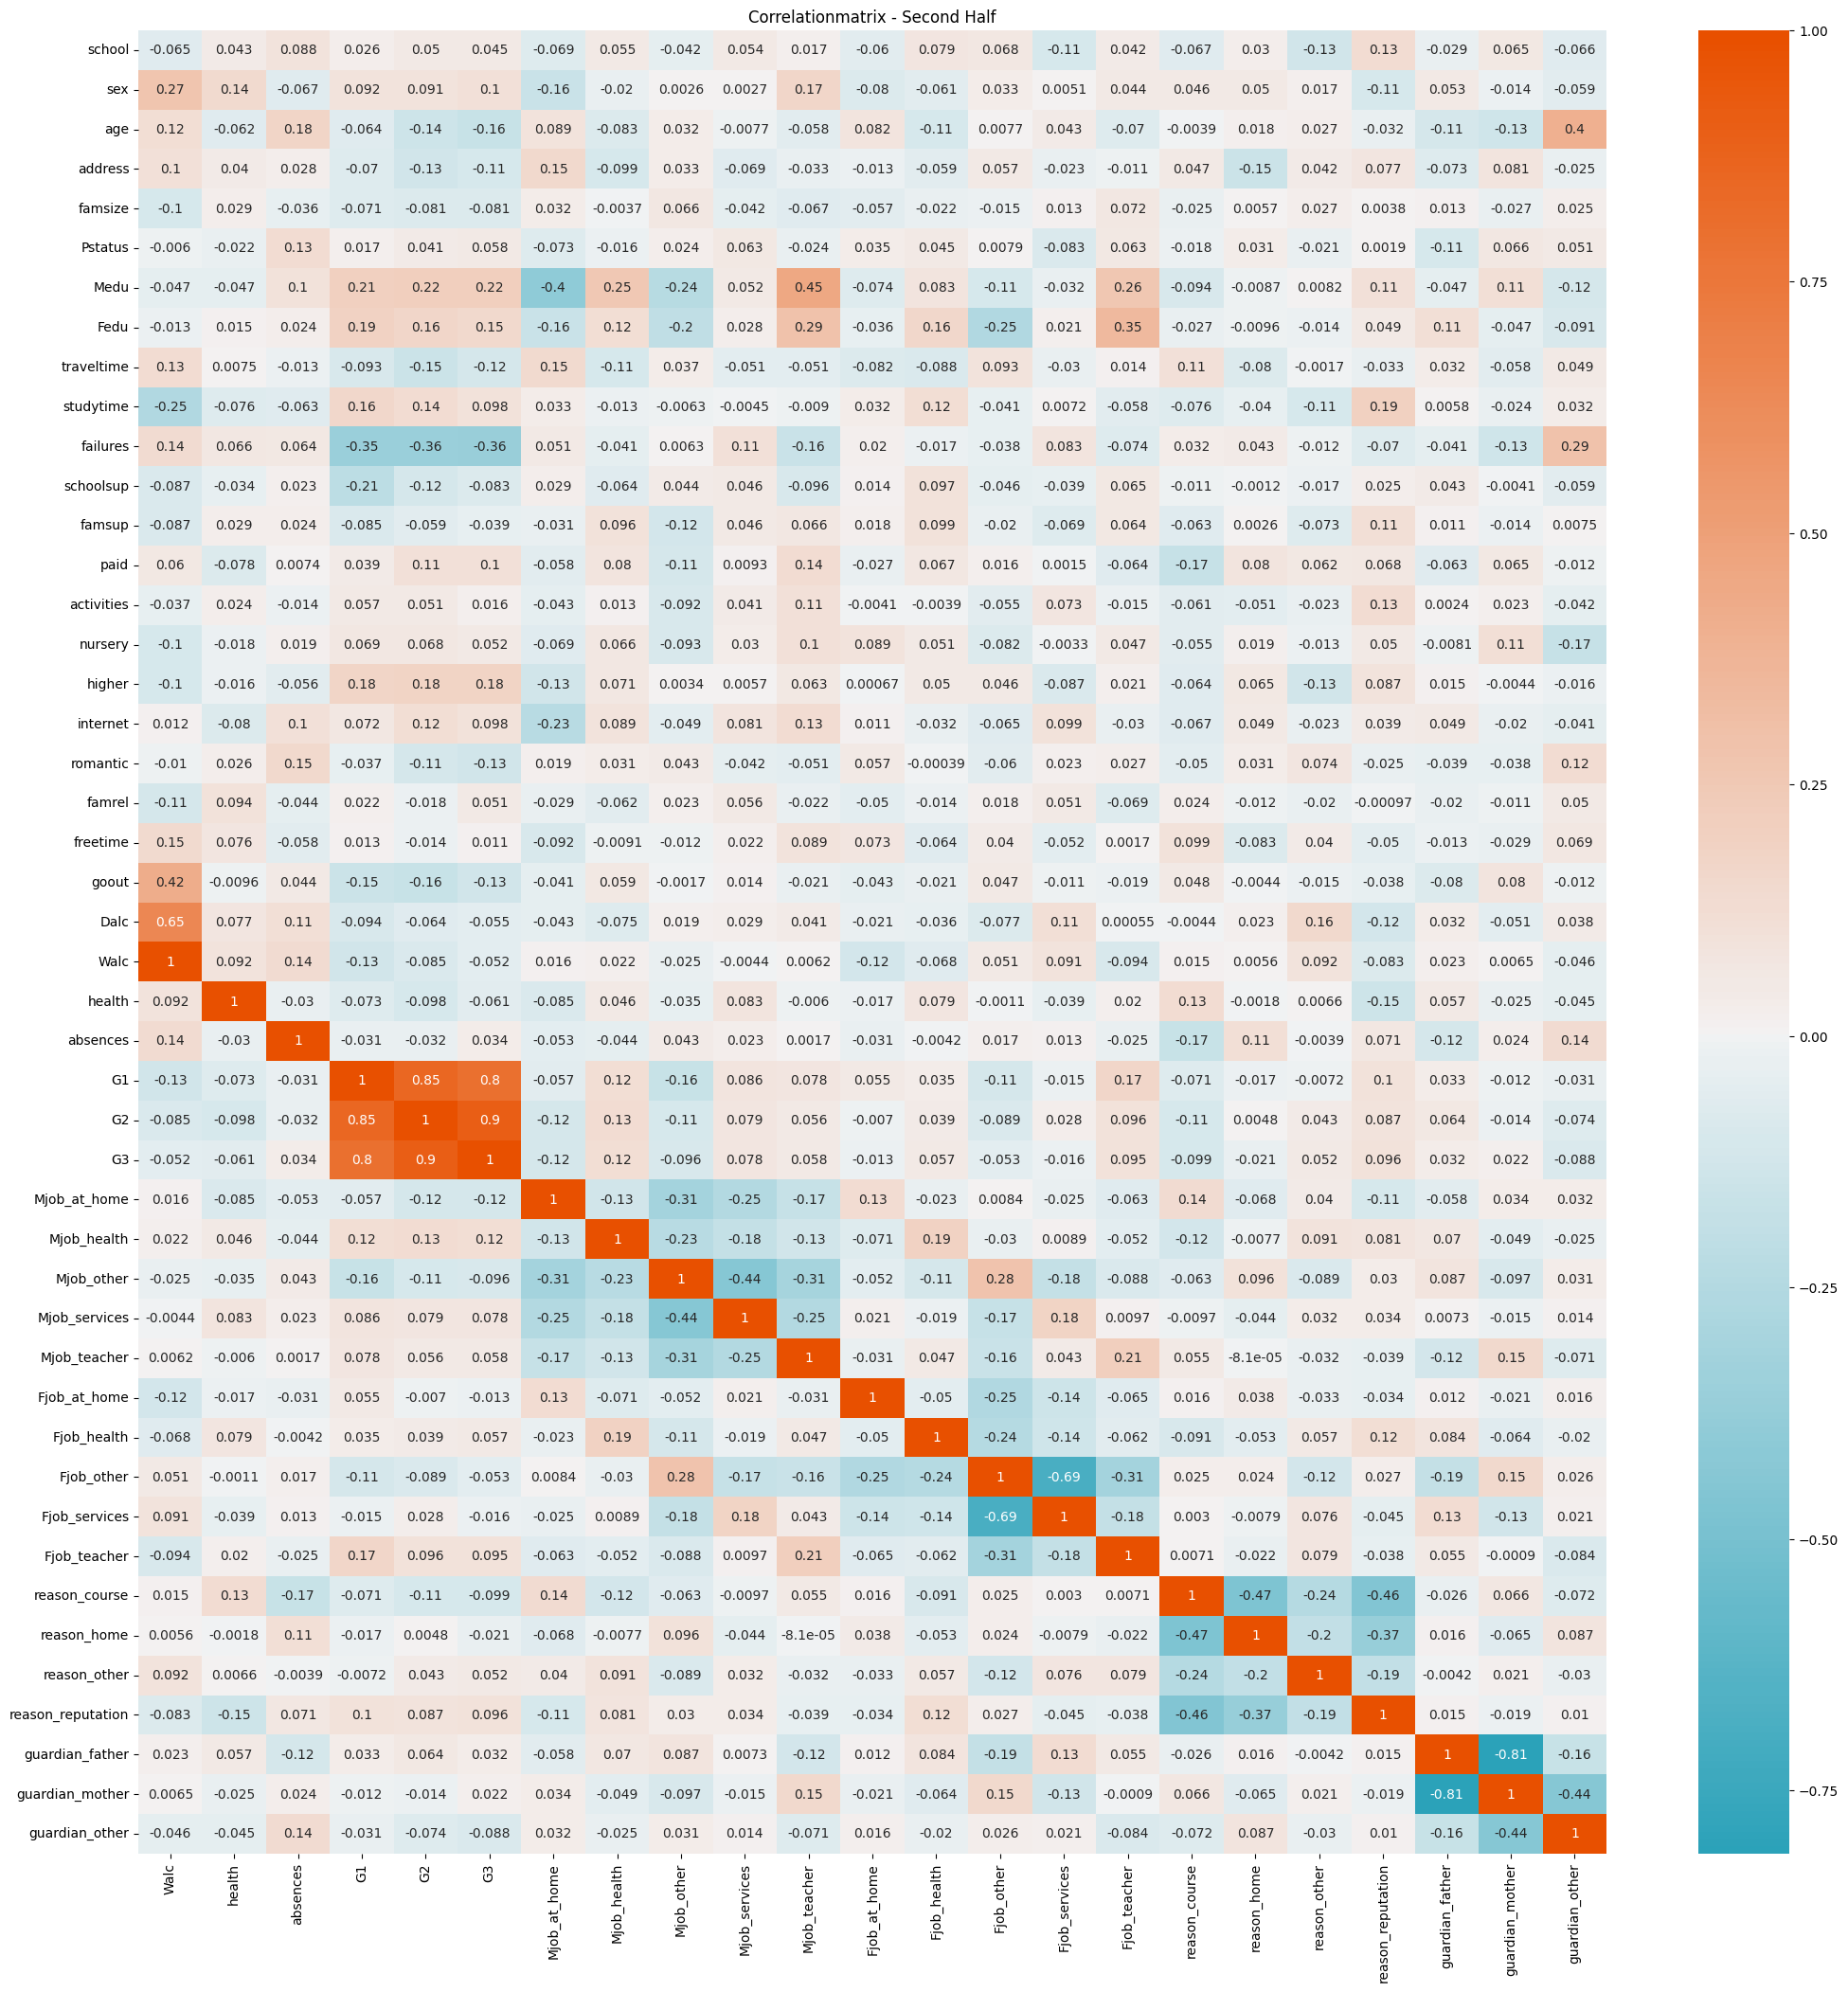

In [38]:
correlation_matrix = df.corr()
half_length = len(correlation_matrix) // 2
first_half = correlation_matrix.iloc[:, :half_length]
second_half = correlation_matrix.iloc[:, half_length:]

plt.figure(figsize=(25, 25))
cmap = sns.diverging_palette(220, 20, s=100, l=55, as_cmap=True)
sns_plot_1 = sns.heatmap(first_half, annot=True, cmap=cmap, center=0)
sns_plot_1.set(title='Correlationmatrix - First Half')
plt.show()

plt.figure(figsize=(25, 25))
sns_plot_2 = sns.heatmap(second_half, annot=True, cmap=cmap, center=0)
sns_plot_2.set(title='Correlationmatrix - Second Half')
plt.show()

In [39]:
correlation_matrix.sort_values('G3', axis=1)

,failures,age,goout,romantic,traveltime,Mjob_at_home,address,reason_course,Mjob_other,guardian_other,schoolsup,famsize,health,Dalc,Fjob_other,Walc,famsup,reason_home,Fjob_services,Fjob_at_home,freetime,activities,guardian_mother,guardian_father,absences,school,famrel,nursery,reason_other,Fjob_health,Mjob_teacher,Pstatus,Mjob_services,Fjob_teacher,reason_reputation,studytime,internet,paid,sex,Mjob_health,Fedu,higher,Medu,G1,G2,G3
school,-0.059804,-0.377610,0.007152,-0.060700,-0.242308,-0.069284,-0.279797,-0.067361,-0.042497,-0.065759,0.139789,0.064866,0.042651,-0.114209,0.067746,-0.065087,0.164967,0.029905,-0.106639,-0.060148,-0.032988,0.116946,0.064783,-0.028582,0.088480,1.000000,0.047926,0.089277,-0.131836,0.079329,0.016823,0.045923,0.053837,0.041674,0.129128,0.090681,0.133578,0.017083,0.012286,0.055139,0.079807,0.024150,0.133333,0.025731,0.050086,0.045017
sex,0.044436,-0.028606,0.075897,-0.102023,0.059722,-0.155501,0.028504,0.045806,0.002626,-0.058525,-0.138271,-0.089862,0.143588,0.268171,0.033307,0.274194,-0.151623,0.049883,0.005083,-0.080212,0.238744,0.099833,-0.013642,0.053098,-0.066962,0.012286,0.058971,-0.008203,0.016859,-0.061306,0.165344,-0.023443,0.002748,0.044147,-0.111434,-0.306268,0.044113,-0.129126,1.000000,-0.019817,0.034878,-0.151056,0.078228,0.091839,0.091099,0.103456
age,0.243665,1.000000,0.126964,0.164669,0.070641,0.088745,0.146722,-0.003913,0.032488,0.398396,-0.251811,-0.037847,-0.062187,0.131125,0.007682,0.117276,-0.140609,0.018283,0.042963,0.082233,0.016434,-0.103063,-0.133558,-0.112046,0.175230,-0.377610,0.053940,-0.086632,0.027172,-0.109842,-0.058256,-0.029598,-0.007732,-0.069993,-0.031932,-0.004140,-0.112094,-0.035933,-0.028606,-0.082660,-0.163438,-0.209081,-0.163658,-0.064081,-0.143474,-0.161579
address,0.078578,0.146722,-0.068835,-0.005257,0.328096,0.151152,1.000000,0.046654,0.032856,-0.025177,-0.024712,0.072472,0.040355,0.093494,0.056929,0.101126,-0.023903,-0.153580,-0.023404,-0.012645,-0.034878,0.051360,0.081376,-0.073259,0.027874,-0.279797,-0.014258,-0.059589,0.041850,-0.058641,-0.033030,-0.042572,-0.068549,-0.010748,0.077227,0.020912,-0.216842,-0.052800,0.028504,-0.099233,-0.072178,-0.042854,-0.138804,-0.069704,-0.126037,-0.105756
famsize,0.015769,-0.037847,-0.023064,-0.034395,-0.063493,0.031786,0.072472,-0.024944,0.066398,0.025298,0.028642,1.000000,0.028992,-0.101521,-0.015408,-0.103425,0.112893,0.005728,0.012871,-0.056774,-0.017695,0.000113,-0.026727,0.012983,-0.035783,0.064866,0.022776,-0.102088,0.026982,-0.021568,-0.067259,-0.149612,-0.041657,0.072183,0.003842,0.073595,-0.000720,0.013882,-0.089862,-0.003732,0.058879,0.005806,0.043068,-0.071445,-0.081223,-0.081407
Pstatus,0.003339,-0.029598,-0.003459,0.040451,-0.028265,-0.072749,-0.042572,-0.018093,0.023641,0.051061,0.042238,-0.149612,-0.022307,0.030590,0.007940,-0.006045,-0.019067,0.031310,-0.083496,0.034984,-0.038717,-0.097352,0.065813,-0.105710,0.134937,0.045923,-0.025179,0.090615,-0.021247,0.045041,-0.023927,1.000000,0.062556,0.063327,0.001903,-0.024294,-0.070074,-0.046435,-0.023443,-0.015659,0.088730,0.040735,0.123565,0.016868,0.041382,0.058009
Medu,-0.236680,-0.163658,0.064094,0.039681,-0.171639,-0.397637,-0.138804,-0.094435,-0.235176,-0.118635,-0.036029,0.043068,-0.046878,0.019834,-0.109887,-0.047123,0.183727,-0.008708,-0.031834,-0.073794,0.030891,0.108277,0.112375,-0.046609,0.100285,0.133333,-0.003914,0.193263,0.008229,0.083398,0.454911,0.123565,0.051764,0.259836,0.106487,0.064944,0.201463,0.159700,0.078228,0.251973,0.623455,0.168845,1.000000,0.205341,0.215527,0.217147
Fedu,-0.250408,-0.163438,0.043105,0.015602,-0.158194,-0.155335,-0.072178,-0.027161,-0.197077,-0.091250,0.037530,0.058879,0.014742,0.002386,-0.253605,-0.012631,0.185496,-0.009618,0.021306,-0.036446,-0.012846,0.112643,-0.047265,0.111422,0.024473,0.079807,-0.001370,0.157177,-0.014364,0.163216,0.294526,0.088730,0.028032,0.347203,0.048724,-0.009175,0.127507,0.086981,0.034878,0.118501,1.000000,0.174566,0.623455,0.190270,0.164893,0.152457
traveltime,0.092239,0.070641,0.028540,0

In [41]:
# save the dataframe
df.to_csv('data/student-mat-processed.csv', index=False)